# Smartphones dataset (Using Sklearn and Keras)

##Importing Necessary Libraries

In [151]:
import math
# Data handling and stuff
import pandas as pd
import numpy as np
# Neural Network Magic Libraries (TensorFlow/Keras)
from tensorflow import keras
print('Tensorflow/Keras: %s' % keras.__version__)
from keras.models import Sequential
from keras.layers import Dense
# from tensorflow.python.keras.layers import Dense
# from tensorflow.python.keras.models import Sequential
from keras import Input #instantiating a keras Tensor

# Sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import classification_report
# from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import TargetEncoder

# Visualization - remove if not used
import matplotlib.pyplot as plt
import seaborn as sns

Tensorflow/Keras: 3.8.0


##Visualization Formatting

In [152]:
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)
pd.set_option("display.max_colwidth", None)
pd.set_option("display.float_format", lambda x: "%.2f" % x)

## Data Acquisition and Preprocessing
##### Importing and Cleaning initial Dataset for Processing

In [153]:
def read_csv(file_path):
    df = pd.read_csv(file_path)
    return df

def clean_data(df):
    df = df.drop_duplicates()
    df = df.dropna()
    df = df.reset_index(drop=True)
    return df

In [154]:
smartphones = read_csv("smartphones.csv")
smartphones = smartphones.drop("model", axis=1).drop("fast_charging", axis=1) # Experiment with the model column for further analysis at own risk
cleaned_smartphones = clean_data(smartphones)
cleaned_smartphones.head()
cleaned_smartphones.info()

y = cleaned_smartphones["price"]
X = cleaned_smartphones.drop("price", axis=1)


categorical_cols = X.select_dtypes(include=['object']).columns
for col in categorical_cols:
    te = TargetEncoder(target_type="continuous", random_state=42, smooth = 'auto')
    data_array = X[col].values.reshape(-1, 1)
    X[col] = te.fit_transform(X[[col]], y)
    # te.fit(data_array, y)
    # X[col] = te.transform(data_array)

# for col in categorical_cols:
  # encoder = TargetEncoder(random_state=42, target_type="continuous")
  # X[col] = encoder.fit_transform(X[col], y)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 811 entries, 0 to 810
Data columns (total 20 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   brand_name                 811 non-null    object 
 1   price                      811 non-null    int64  
 2   avg_rating                 811 non-null    float64
 3   5G_or_not                  811 non-null    int64  
 4   processor_brand            811 non-null    object 
 5   num_cores                  811 non-null    float64
 6   processor_speed            811 non-null    float64
 7   battery_capacity           811 non-null    float64
 8   fast_charging_available    811 non-null    int64  
 9   ram_capacity               811 non-null    int64  
 10  internal_memory            811 non-null    int64  
 11  screen_size                811 non-null    float64
 12  refresh_rate               811 non-null    int64  
 13  num_rear_cameras           811 non-null    int64  

##Building our Feedforward Neural Network

##### Splitting training and testing samples

In [155]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

## Scaling our Data for Processing

In [156]:
# Scale Features
scaler_X = StandardScaler()
X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)
# Scale Target
scaler_y = StandardScaler()
y_train_scaled = scaler_y.fit_transform(y_train.values.reshape(-1, 1))
y_test_scaled = scaler_y.transform(y_test.values.reshape(-1, 1))

##### Defining the Structure of the Neural Network

In [157]:
# This is where the fun begins hehe
model = Sequential(name="Smartphones_NN")
model.add(Input(shape=(X_train_scaled.shape[1],))) # Should dynamically make inputs based on the number of columns in X...hopefully
model.add(Dense(128, activation='relu'))  #  aaasasqsasa
model.add(Dense(64, activation='relu')) # Play around with the Hidden layer number of Neurons
model.add(Dense(1)) # Play around with different activation functions I guess, or do a masters in Data Science
model.summary()


Model: "Smartphones_NN"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_30 (Dense)                     │ (None, 128)                 │           2,560 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_31 (Dense)                     │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_32 (Dense)                     │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 10,881 (42.50 KB)

 Trainable params: 10,881 (42.50 KB)

 Non-trainable params: 0 (0.00 B)

##### Compile Keras model aka Magic

In [158]:
# attempting for testing, need to consider appropriateness of each parameter in detail
model.compile(optimizer='adam', # used in backpropagation
              loss='mean_squared_error', # Loss function to be optimized
              metrics=['mae']) # List of metrics to be evaluated by the model during training and testing

In [159]:
print("X_train_scaled shape:", X_train_scaled.shape)
print("y_train_scaled shape:", y_train_scaled.shape)

X_train_scaled shape: (648, 19)
y_train_scaled shape: (648, 1)


##### Fitting keras model onto the dataset

In [160]:
batch_size = 32  # Desired batch size

history = model.fit(X_train_scaled, y_train_scaled,
                    validation_data=(X_test_scaled, y_test_scaled),
                    epochs=100,
                    batch_size=batch_size,
                    verbose=1)


# model.fit(X_train_scaled, y_train_scaled, batch_size=batch_size,steps_per_epoch=steps_per_epoch, epochs=10)

Epoch 1/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 1.4286 - mae: 0.4366 - val_loss: 1.3435 - val_mae: 0.3669
Epoch 2/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.8528 - mae: 0.2877 - val_loss: 1.3086 - val_mae: 0.2928
Epoch 3/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2155 - mae: 0.2120 - val_loss: 1.3021 - val_mae: 0.3067
Epoch 4/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.6869 - mae: 0.2468 - val_loss: 1.3128 - val_mae: 0.2927
Epoch 5/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.2220 - mae: 0.1962 - val_loss: 1.3040 - val_mae: 0.3208
Epoch 6/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.2790 - mae: 0.2821 - val_loss: 1.2868 - val_mae: 0.3146
Epoch 7/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.4264 - mae: 0.2019 - val_loss: 1.2926 - val_mae: 0.2817
Epoch 8/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.6642 - mae: 0.2046 - val_loss: 1.2697 - val_mae: 0.2971
Epoch 9/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.99

##### Making Predictions with our model

Evaluating model

In [161]:
train_loss, train_mae = model.evaluate(X_train_scaled, y_train_scaled, verbose=0)
test_loss, test_mae = model.evaluate(X_test_scaled, y_test_scaled, verbose=0)


###### Returning the prices to actual values

In [162]:
# Convert metrics back to original scale
train_mae_dollars = train_mae * scaler_y.scale_[0]
test_mae_dollars = test_mae * scaler_y.scale_[0]

print(f"\nTraining MAE (USD): ${train_mae_dollars:.2f}")
print(f"Test MAE (USD): ${test_mae_dollars:.2f}")


Training MAE (USD): $1172.46
Test MAE (USD): $7246.85


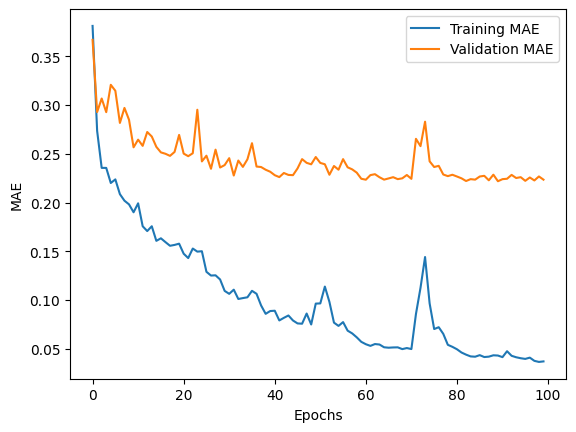

In [163]:
plt.plot(history.history['mae'], label='Training MAE')
plt.plot(history.history['val_mae'], label='Validation MAE')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()
plt.show()

In [139]:
# Make predictions and compare with true values
y_pred_scaled = model.predict(X_test_scaled)
y_pred = scaler_y.inverse_transform(y_pred_scaled)

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


##Plots

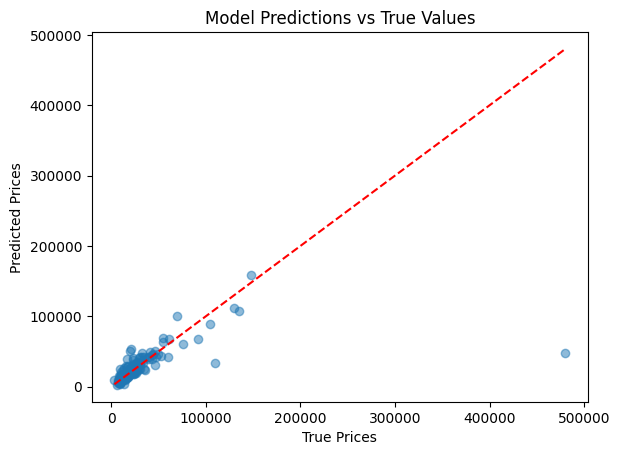

In [164]:
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--')
plt.xlabel("True Prices")
plt.ylabel("Predicted Prices")
plt.title("Model Predictions vs True Values")
plt.show()